# ETL - MRST Datasheet

**Nikos Fragkiskatos**

[Back to top](#Index)


##  Abstract
Using Extract-Transform-Load ETL methods, we explore a dataset from *census.gov*, the *MRST* dataset. The project begins by planning all of the required filtering that is to be done on the dataset, before importing it to Jupyter. Once it has been manually brought to a satisfactory point, the dataset is imported here, and extraction process begins. We then move onto further *transforming* the data through various filters. Once the data is transformed, its structure is as follows:
- Table format
- 13 columns, of which 12 are months, and 1 is a sale category
- 36-37 rows of data, all integers except in the sale category column

Once the data is transformed as described, the *Load* portion begins. Various queries from Python are used for interfacing with MySQL locally. The queries perform various functions like table creation and querying. In the end, we perform rolloing window analysis on that data and come to conclusions about it.

[Back to top](#Index)


## 1. Introduction

Our project is centered around creating a robust ETL (Extract, Transform, Load) pipeline, facilitating comprehensive data analysis, and creating visual meaningful representations of our data. This endeavor follows a structured approach to handle the MRTS dataset efficiently.

The initial phase involves a thorough understanding of the dataset, distinguishing between various categories such as Adjusted versus Non-Adjusted data. We then decide on the data to retain for our specific project goals. This step is critical as it sets the tone for the kind of analysis we aim to achieve.

We prepare the data for analysis, which involves cleaning and filtering operations that can were executed manually, and scripted in Python as well. The extracted data is then read using Python, with the 'csv' library for basic reading and 'pandas' for more advanced manipulation. The transformation process includes filtering and formatting the data for SQL compatibility.

Next step is loading the data into a MySQL database, completing the ETL process. The code snippets provided illustrate how we employ Python libraries to read and process data before it enters the database.

Finally, we perform numerous queries on the data at MySQL using Python scripts, in order to analyze it. We make calculated predictions using rolling time window analysis on two tables.

Upon completion, the project will detail each step undertaken, from understanding the dataset to visualizing the analysis. This documentation will serve as a comprehensive guide to our ETL pipeline, providing insights into the methodology and technologies used to achieve our objectives.

[Back to top](#Index)

## 2. Extract-Transform-Load


[Back to top](#Index)

### 2.1 The ETL Process

The main idea is the following:
- Understand the data. Do some general clean-up/filtering.
- Read the data and store it into variables that can be used in the program.
- Send the data from these variables to MySQL database.

Here are some more details of the key steps to perform ETL on the provided MRTS dataset:

1. Familiarize ourselves with the dataset. Understand its contents by recognizing the significance of each chapter. For example, Adjusted vs Non-Adjusted data.
2. Deciding which modifications to do on the dataset for the purposes of this project. Which data do we want to keep, and why.
3. Preparing the data do make it ready for analysis. This can be done manually, or through a python script.
4. After the data is prepared, to read the data using Python.
5. Make any further modifications that were not done manually, using Python.
6. Writing the data the the MySQL database that we have connected.

- Steps 1-3 can be thought of as the *Extract* portion of ETL, since we become familiar with our data, prepare it, and read it.
- Steps 4-5 are the *Transform* steps. In here, we filter the data and put it in a format that can be converted to SQL.
- Step 6 is the *Load* step, since we finally push the data into our database.

[Back to top](#Index)

### 2.2 Data Exploration

The MRTS dataset contains data on retail economic activity in the United States. It is released by *[census.gov](https://www.census.gov/retail/index.html)*, and shows estimates in millions of dollars, based on data from the Monthly Retail Trade Survey, Annual Retail Trade Survey, Service Annual Survey, and administrative records.

Our dataset contains data from the beginning of 1992, through February of 2021. If the data does not meet publication standards because of high sampling variability, or if there are other concerns about an estimate's quality, it is considered *Suppressed*, and its value is shown as *(S)*. This value will be converted to a *null* entry in our case.

There are two main categories of estimates: *Adjusted* and *Non-adjusted*:
- *Adjusted* are the estimates presents sales data that has been adjusted for seasonal variations, holidays, or other factors to provide a more accurate picture of monthly sales trends. 
- *Non-adjusted* is the raw sales data.

Note: In this project, we will be working with ***Adjusted*** data. In the video, Dr. Sanchez chooses to work with Non-adjusted. However, there is no restriction in the project on what we can use, an thus choose to select Adjusted data.

[Back to top](#Index)

### 2.3 Data Preparation

We made made some manual preparations to the data, in order to filter out any data that will not contribute to our project. Here, you can see two images that summarize the manual preparation:

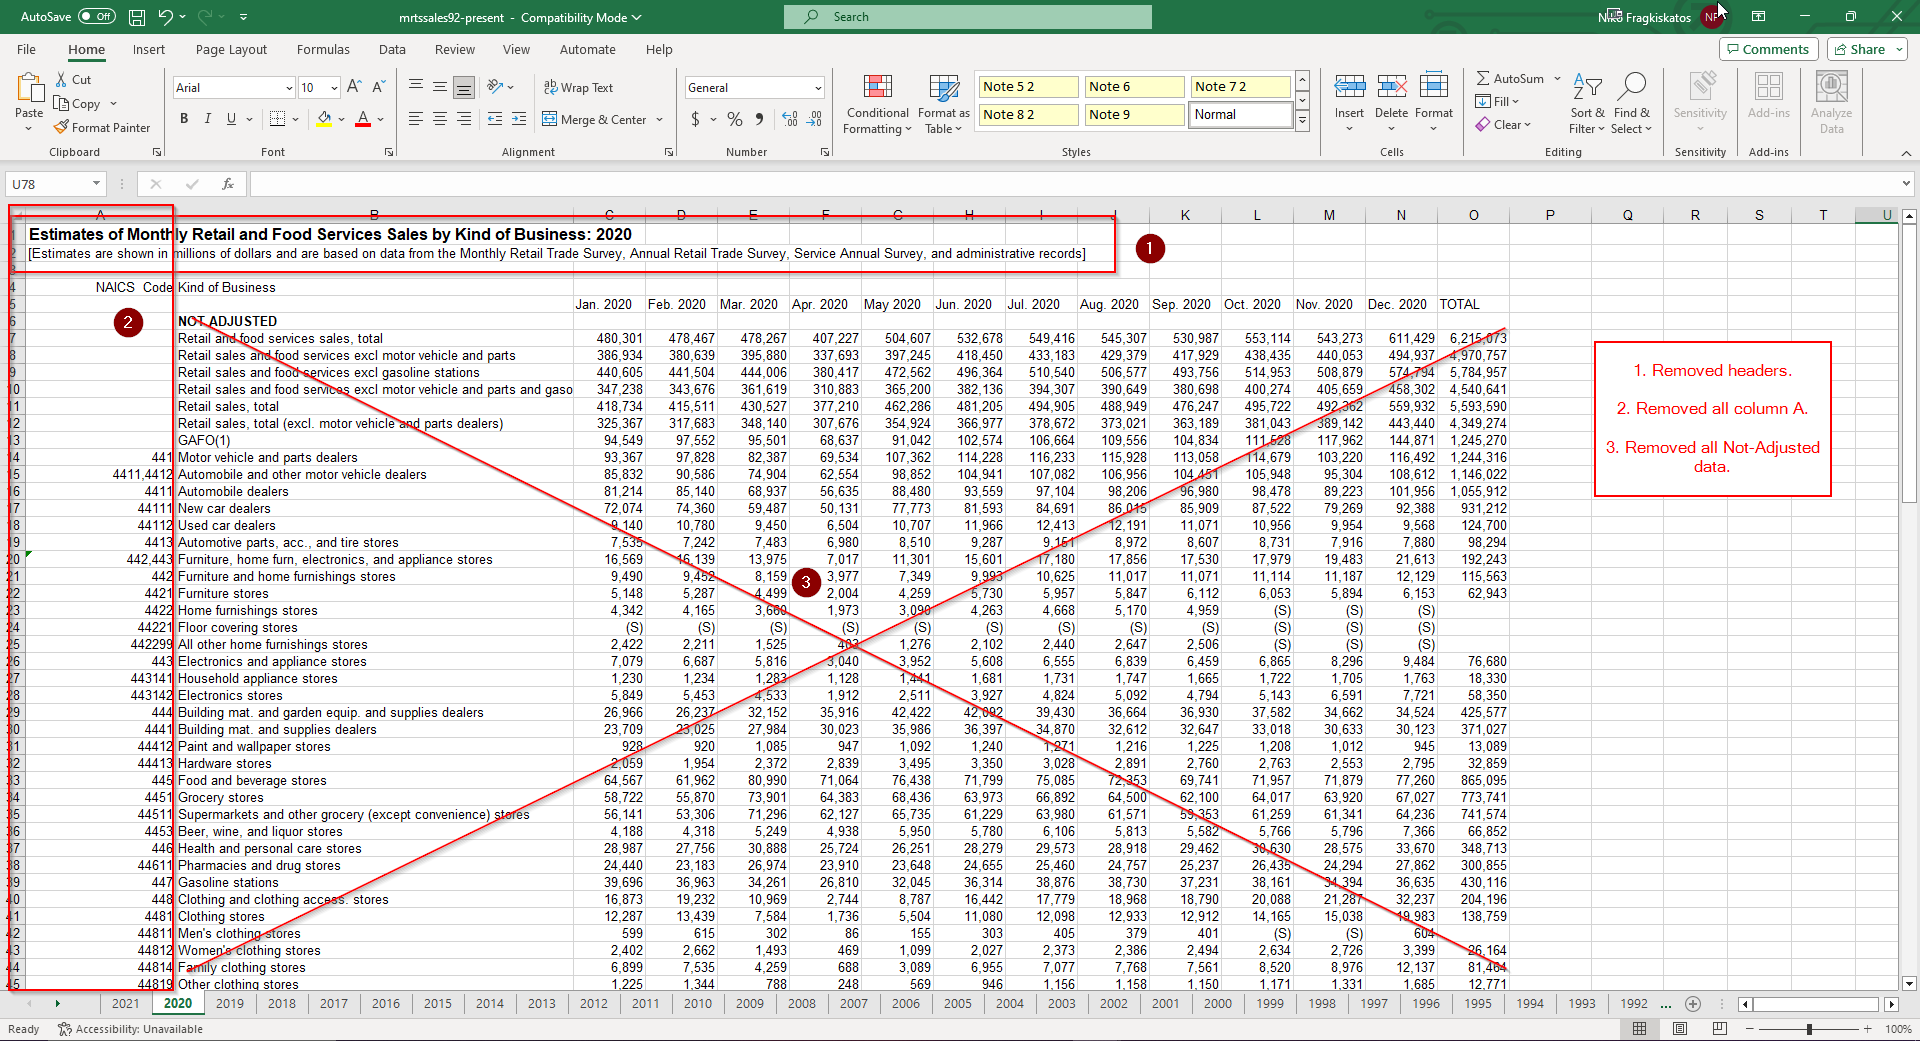



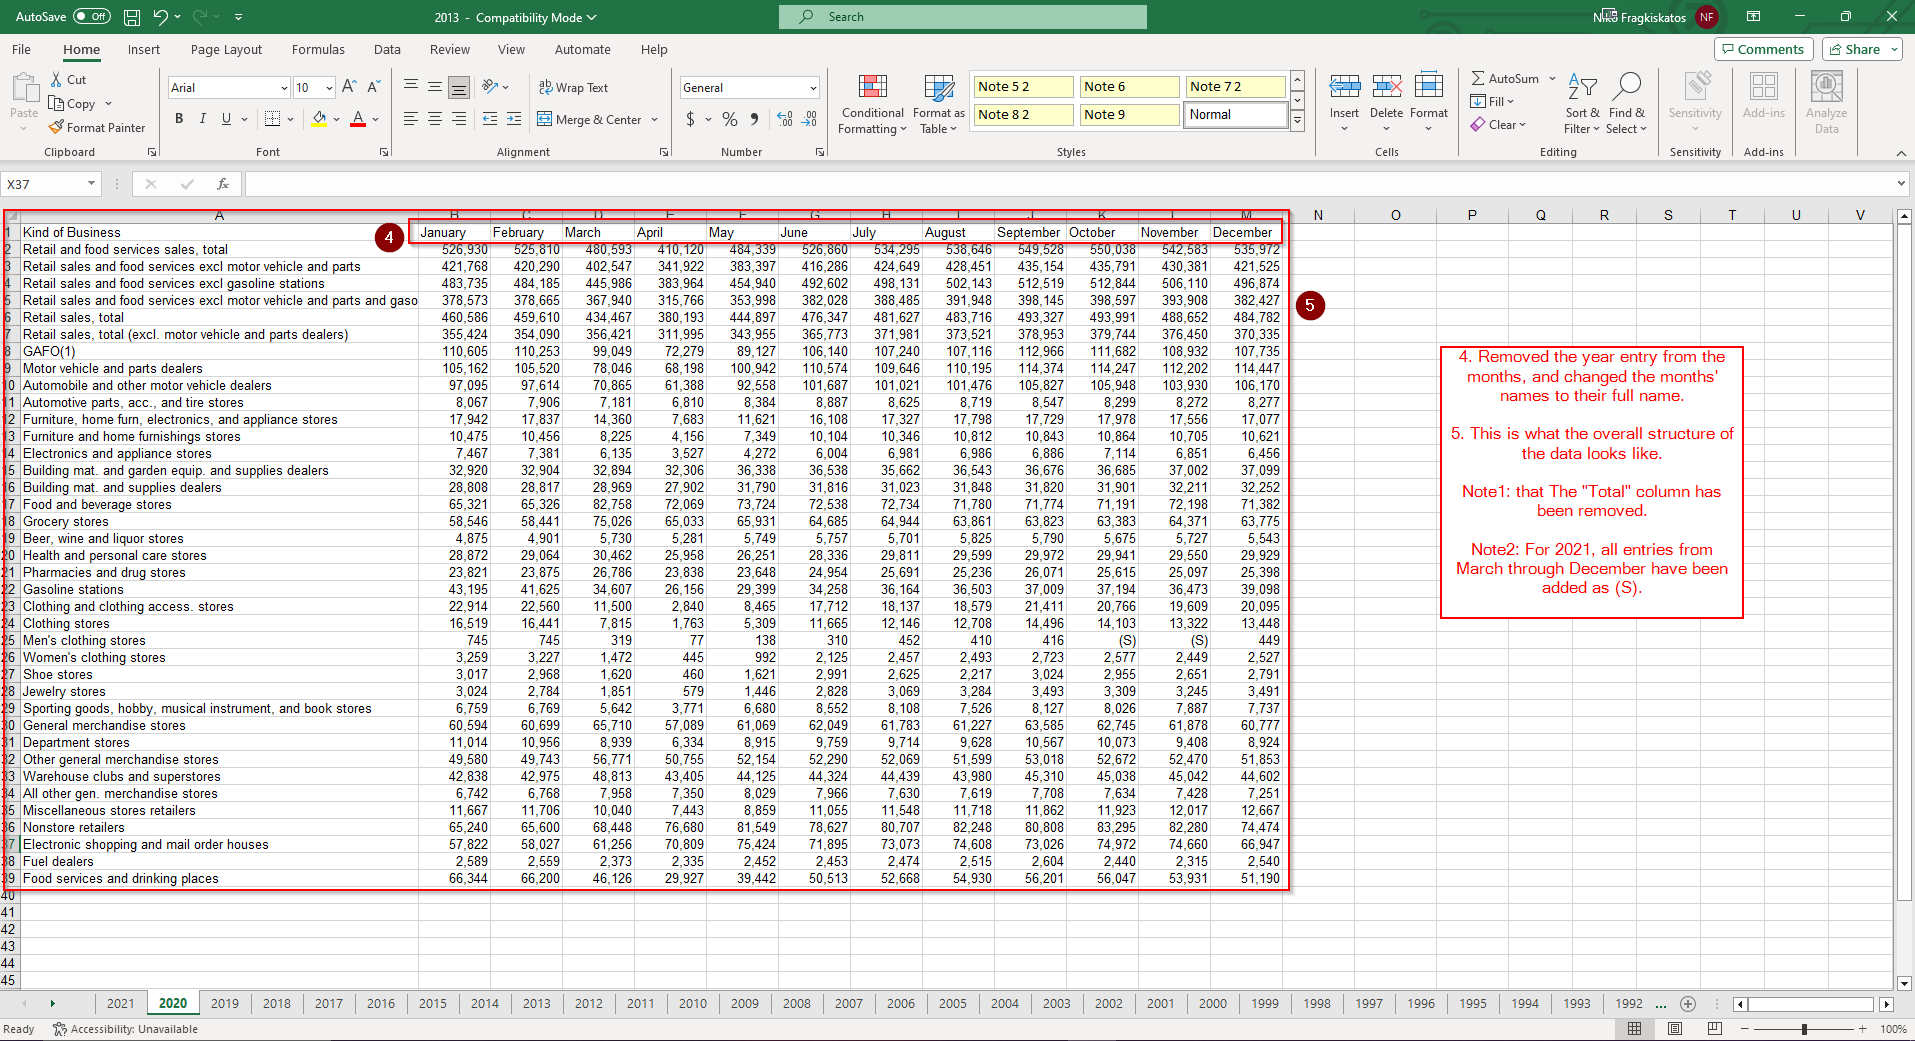

[Back to top](#Index)

### 2.4 Read the Data Using Python


Using Python, there are various methods to read CSV files. The method we will use in this project is through the *csv* python library.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

In this section, we will show an example of how reading data using the csv Python library can be done. We are using a sample with content created by us; we are not focusing on the content. Instead, we are showing how to read sample data. Note that this process is the one shown in video 8.1:

In [1]:
import csv

csv_file_path = 'MRTS_CSV_Files/sample_CSV.csv'

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(row)

['order_id', ' timestamp', ' item', ' color']
["'ord001'", "'2023-10-28 19:09:55'", " 't-shirt'", " 'red'"]
["'ord002'", "'2023-10-28 19:03:32'", " 'pants'", " 'black'"]
["'ord003'", "'2023-10-28 18:33:44'", " 'jacket'", " 'blue'"]
["'ord004'", "'2023-10-28 18:17:38'", " 'pants'", " 'green'"]
["'ord005'", "'2023-10-28 15:35:03'", " 'jacket'", " 'yellow'"]
["'ord006'", "'2023-10-28 15:23:11'", " 't-shirt'", " 'red'"]


This is how the data was created in Notepad ++ (manually typed):

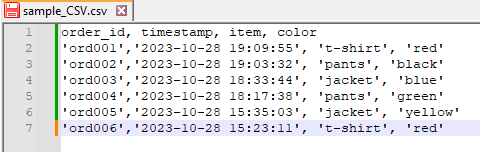

and then saved as CSV. That CSV is what is being read here, in this path: *'MRTS_CSV_Files/sample_CSV.csv'*.

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data


For this purpose, we will follow a different method than the above. Instead of using the csv library, we will use pandas instead.

From the second image of section 2.3, we see the format that the data is currently at. For each year, we have a csv file. Thus, we will read the data from each year, and store it in a dataframe. All of these csv files are stored in the path*'MRTS_CSV_Files/[year].csv'*:

Let's see an example of how the csv of with the 1992 data looks like:

In [3]:
csv_file_path = 'MRTS_CSV_Files/1992.csv'
import pandas as pd

df = pd.read_csv(csv_file_path)
df

Kind of Business  January February  \
0               Retail and food services sales, total  175,108  173,744   
1   Retail sales and food services excl motor vehi...  137,487  137,021   
2   Retail sales and food services excl gasoline s...  161,710  160,148   
3   Retail sales and food services excl motor vehi...  124,089  123,425   
4                                 Retail sales, total  157,555  156,266   
5   Retail sales, total (excl. motor vehicle and p...  119,934  119,543   
6                                             GAFO(1)   46,591   45,838   
7                     Motor vehicle and parts dealers   37,621   36,723   
8          Automobile and other motor vehicle dealers   34,021   33,087   
9             Automotive parts, acc., and tire stores    3,600    3,636   
10  Furniture, home furn, electronics, and applian...    9,032    8,850   
11              Furniture and home furnishings stores    4,637    4,507   
12                   Electronics and appliance stores    4,395    4,343   
13  Building mat. and garden equip. and supplies d...   11,333   11,410   
14                 Building mat. and supplies dealers    9,634    9,744   
15                           Food and beverage stores   31,045   31,233   
16                                     Grocery stores   28,220   28,419   
17                       Beer, wine and liquor stores    1,840    1,836   
18                    Health and personal care stores    7,518    7,651   
19                         Pharmacies and drug stores    6,426    6,566   
20                                  Gasoline stations   13,398   13,596   
21               Clothing and clothing access. stores   10,581   10,150   
22                                    Clothing stores    7,621    7,265   
23                              Men's clothing stores      828      824   
24                            Women's clothing stores    3,011    2,709   
25                                        Shoe stores    1,572    1,534   
26                                     Jewelry stores    1,270    1,242   
27  Sporting goods, hobby, musical instrument, and...    3,648    3,585   
28                         General merchandise stores   21,383   21,392   
29                                  Department stores   15,334   15,119   
30                   Other general merchandise stores    6,049    6,273   
31                    Warehouse clubs and superstores    3,394    3,579   
32                  All other gen. merchandise stores    2,655    2,694   
33                     Miscellaneous stores retailers    5,352    4,896   
34                                 Nonstore retailers    6,644    6,780   
35          Electronic shopping and mail order houses    3,184    3,230   
36                                       Fuel dealers    1,326    1,385   
37                  Food services and drinking places   17,553   17,478   
38                                                NaN      NaN      NaN   
39                                                NaN      NaN      NaN   
40                                                NaN      NaN      NaN   
41                                                NaN      NaN      NaN   
42                                                NaN      NaN      NaN   

      March    April      May     June     July   August September  October  \
0   172,306  176,749  178,426  178,157  180,743  180,707   181,773  182,884   
1   136,351  138,228  139,420  139,265  140,453  140,203   141,570  142,027   
2   158,819  163,210  164,905  164,696  167,241  167,335   168,357  169,129   
3   122,864  124,689  125,899  125,804  126,951  126,831   128,154  128,272   
4   154,752  158,979  160,605  160,127  162,816  162,506   163,258  164,685   
5   118,797  120,458  121,599  121,235  122,526  122,002   123,055  123,828   
6    45,536   46,789   47,239   47,261   48,003   47,827    48,228   48,317   
7    35,955   38,521   39,006   38,892   40,290   40,504    40,203   40,857   
8    32,430   34,849   35

There are numerous NaN's that have to be cleaned out of the dataset. These NaN's are actually common across all years' csv files. Thus, let's make a function to cycle through all of the data, clean it, and store it locally.

In [4]:
def ReadMRTS(BeginningYear, EndingYear):
    import pandas as pd

    try:
        if (BeginningYear<=0 or EndingYear<=0) or (EndingYear<BeginningYear) or not isinstance(BeginningYear,int) or not isinstance(EndingYear,int):
            raise ValueError
        else:
            dict1 = {}
            for i in range(BeginningYear,EndingYear+1):

                file_path = 'MRTS_CSV_Files/' + str(i) + '.csv'

                df = pd.read_csv(file_path)

                dict1[str(i)] = df

            return dict1


    except:
        raise ValueError

dictToFilter = ReadMRTS(1992,2021)
dictToFilter

{'1992':                                      Kind of Business  January February  \
 0               Retail and food services sales, total  175,108  173,744   
 1   Retail sales and food services excl motor vehi...  137,487  137,021   
 2   Retail sales and food services excl gasoline s...  161,710  160,148   
 3   Retail sales and food services excl motor vehi...  124,089  123,425   
 4                                 Retail sales, total  157,555  156,266   
 5   Retail sales, total (excl. motor vehicle and p...  119,934  119,543   
 6                                             GAFO(1)   46,591   45,838   
 7                     Motor vehicle and parts dealers   37,621   36,723   
 8          Automobile and other motor vehicle dealers   34,021   33,087   
 9             Automotive parts, acc., and tire stores    3,600    3,636   
 10  Furniture, home furn, electronics, and applian...    9,032    8,850   
 11              Furniture and home furnishings stores    4,637    4,507   
 12 

Now we have a dictionary with keys the years, and values the dataframes of each year.

Analyzing this dictionary *(dictToFilter)*, there is more cleaning to be completed. For example, all entires beyond row 37 do not have any content. We will create a script that utilizes the *last_valid_index()* method get rid of the rest of the rows:

In [5]:
for year, values in dictToFilter.items():
    for i in range(38,49):
        try:
            dictToFilter[year] = dictToFilter[year].drop(index=i)
        except:
            pass
        print(values)

                                     Kind of Business  January February  \
0               Retail and food services sales, total  175,108  173,744   
1   Retail sales and food services excl motor vehi...  137,487  137,021   
2   Retail sales and food services excl gasoline s...  161,710  160,148   
3   Retail sales and food services excl motor vehi...  124,089  123,425   
4                                 Retail sales, total  157,555  156,266   
5   Retail sales, total (excl. motor vehicle and p...  119,934  119,543   
6                                             GAFO(1)   46,591   45,838   
7                     Motor vehicle and parts dealers   37,621   36,723   
8          Automobile and other motor vehicle dealers   34,021   33,087   
9             Automotive parts, acc., and tire stores    3,600    3,636   
10  Furniture, home furn, electronics, and applian...    9,032    8,850   
11              Furniture and home furnishings stores    4,637    4,507   
12                   Elec

                                     Kind of Business  January February  \
0               Retail and food services sales, total  208,699  212,008   
1   Retail sales and food services excl motor vehi...  158,350  159,720   
2   Retail sales and food services excl gasoline s...  193,220  196,551   
3   Retail sales and food services excl motor vehi...  142,871  144,263   
4                                 Retail sales, total  189,135  192,266   
5   Retail sales, total (excl. motor vehicle and p...  138,786  139,978   
6                                             GAFO(1)   54,718   55,394   
7                     Motor vehicle and parts dealers   50,349   52,288   
8          Automobile and other motor vehicle dealers   45,865   47,731   
9             Automotive parts, acc., and tire stores    4,484    4,557   
10  Furniture, home furn, electronics, and applian...   11,493   11,594   
11              Furniture and home furnishings stores    5,302    5,346   
12                   Elec

                                     Kind of Business  January February  \
0               Retail and food services sales, total  375,236  371,833   
1   Retail sales and food services excl motor vehi...  301,402  299,627   
2   Retail sales and food services excl gasoline s...  332,813  329,329   
3   Retail sales and food services excl motor vehi...  258,979  257,123   
4                                 Retail sales, total  337,412  334,584   
5   Retail sales, total (excl. motor vehicle and p...  263,578  262,378   
6                                             GAFO(1)   95,762   95,010   
7                     Motor vehicle and parts dealers   73,834   72,206   
8          Automobile and other motor vehicle dealers   67,606   65,976   
9             Automotive parts, acc., and tire stores    6,228    6,230   
10  Furniture, home furn, electronics, and applian...   18,048   17,790   
11              Furniture and home furnishings stores    8,873    8,594   
12                   Elec

                                     Kind of Business  January February  \
0               Retail and food services sales, total  395,720  400,329   
1   Retail sales and food services excl motor vehi...  324,000  327,740   
2   Retail sales and food services excl gasoline s...  349,968  353,158   
3   Retail sales and food services excl motor vehi...  278,248  280,569   
4                                 Retail sales, total  352,862  357,379   
5   Retail sales, total (excl. motor vehicle and p...  281,142  284,790   
6                                             GAFO(1)   98,386   99,959   
7                     Motor vehicle and parts dealers   71,720   72,589   
8          Automobile and other motor vehicle dealers   64,527   65,522   
9             Automotive parts, acc., and tire stores    7,193    7,067   
10  Furniture, home furn, electronics, and applian...   16,168   16,165   
11              Furniture and home furnishings stores    7,646    7,627   
12                   Elec

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Notice the endpoints of the range in the for loop above: 38 and 49. This is because, going over the datasets, all datasets had invalid entries beyond row 37 up to 42 or 48. Thus, 49 is a good upper limit to use.

Now that the invalid rows are gon, we can continue by cleaning the two last columns in our dataset:
- Unnamed: 13
- Unnamed: 14

These two columns have NaN entries only, thus need to be removed. We execute the following:

In [6]:
for year, values in dictToFilter.items():
        try:
            dictToFilter[year] = dictToFilter[year].drop(columns='Unnamed: 13')
            dictToFilter[year] = dictToFilter[year].drop(columns='Unnamed: 14')
        except:
            pass
        print(values)

                                     Kind of Business  January February  \
0               Retail and food services sales, total  175,108  173,744   
1   Retail sales and food services excl motor vehi...  137,487  137,021   
2   Retail sales and food services excl gasoline s...  161,710  160,148   
3   Retail sales and food services excl motor vehi...  124,089  123,425   
4                                 Retail sales, total  157,555  156,266   
5   Retail sales, total (excl. motor vehicle and p...  119,934  119,543   
6                                             GAFO(1)   46,591   45,838   
7                     Motor vehicle and parts dealers   37,621   36,723   
8          Automobile and other motor vehicle dealers   34,021   33,087   
9             Automotive parts, acc., and tire stores    3,600    3,636   
10  Furniture, home furn, electronics, and applian...    9,032    8,850   
11              Furniture and home furnishings stores    4,637    4,507   
12                   Elec

We are getting closer to having a clean dataset to work with. The next step is to convert each number entry to an integer value. Right now, they look like integers, but they are actually strings:

In [6]:
type(dictToFilter['1992']['January'][0])

str

We will use the *string.replace* method to solve this:

In [7]:
for year, values in dictToFilter.items():
        try:
            for i, j in dictToFilter[year].items():
                if i != 'Kind of Business':
                    for k in range(0,38):
                        if dictToFilter[year][i][k] != '(S)' and not isinstance(dictToFilter[year][i][k],int):
                            dictToFilter[year][i][k] = int(dictToFilter[year][i][k].replace(',', ''))      
        except:
            pass
type(dictToFilter['1992']['January'][0])

int

Next, we need to replace any *(S)* entries from the dataset with *NaN's*:

In [8]:
import numpy as np
for year, values in dictToFilter.items():
    try:
        for i, j in dictToFilter[year].items():
            for k in range(0,38):
                try:
                    if dictToFilter[year][i][k] == '(S)':
                        dictToFilter[year][i] = dictToFilter[year][i].drop([k])
                except:
                    pass
    except:
        pass

All *(S)* entries have now been replaced with *NaN's*. Besides 2021, the only year with *NaN's* is 2020. We will remove the rows with *NaN's* here:

In [9]:
dictToFilter['2020']['Kind of Business']
dictToFilter['2020'] = dictToFilter['2020'].drop(index=23)
dictToFilter['2020']['Kind of Business']

0                 Retail and food services sales, total
1     Retail sales and food services excl motor vehi...
2     Retail sales and food services excl gasoline s...
3     Retail sales and food services excl motor vehi...
4                                   Retail sales, total
5     Retail sales, total (excl. motor vehicle and p...
6                                               GAFO(1)
7                       Motor vehicle and parts dealers
8            Automobile and other motor vehicle dealers
9               Automotive parts, acc., and tire stores
10    Furniture, home furn, electronics, and applian...
11                Furniture and home furnishings stores
12                     Electronics and appliance stores
13    Building mat. and garden equip. and supplies d...
14                   Building mat. and supplies dealers
15                             Food and beverage stores
16                                       Grocery stores
17                         Beer, wine and liquor

Now, all of our data is ready to send. All that remains is to find an efficient way to cycle through it, in order to send it to the MySQL database.

[Back to top](#Index)

### 2.5 Writing an Installation Script


We are using yaml for the password.

First, we are going to connect to MySQL, create the database and the tables:

In [10]:
import yaml
import mysql.connector

db = yaml.safe_load(open('db.yaml'))

config = {
    'user': db['user'],
    'password': db['pswd'],
    'host': db['host'],
    'database': db['db'],
    'auth_plugin': 'my_sqlnative_password'
}

cnx = mysql.connector.connect(**config)

mycursor = cnx.cursor()

mycursor.execute("""CREATE DATABASE IF NOT EXISTS MRST_Entries;

    USE MRST_Entries;""")

Note: for the purposes of this project, I had to perform the following:

- `cnx.close()`
- `cnx = mysql.connector.connect(**config)`
- `mycursor = cnx.cursor()`

in every iteration. Otherwise, it returned to me the following error:

- `DatabaseError: 2014 (HY000): Commands out of sync; you can't run this command now.`

While I did troubleshoot the issue, I did not find a more efficient way than closing and reopening the connection. However, given the that the data exchange is only local, it did not cause any network speed reduction.

In [112]:
cnx.close()
cnx = mysql.connector.connect(**config)
mycursor = cnx.cursor()
for i in range(1992,2021):
    cnx.close()
    cnx = mysql.connector.connect(**config)
    mycursor = cnx.cursor()
    mycursor.execute("""USE mrst_Entries;""")
    mycursor.execute("""CREATE TABLE IF NOT EXISTS """ + str(i) +"""_Entries (

        Kind_Of_Business varchar(100),
        January int,
        February int,
        March int,
        April int,
        May int,
        June int,
        July int,
        August int,
        September int,
        October int,
        November int,
        December int
    );""")

Now it is time create a script to insert all values to the corresponding table. The idea is the following: we need to make extract the data out of *`dictToFilter`* and to get it in the follownig format:

In [ ]:
INSERT INTO table_name (column1, column2, column3, ...)
VALUES
(value1, value2, value3, ..., value12),
(value13, value14, value15, ..., value25,),
(value_(n-12), value(n-11), value(n-10), ..., value_n);

where each value is a value from the `dictToFilter` dataframes' contents.

In [15]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tuples = []

for i in range(1992, 2021):
    df = dictToFilter[str(i)]
    
    for j in range(38):
        temp_list = []
        
        for month in months:
            series_value = df[month]
            value = series_value.iloc[j] if j < len(series_value) else None
            if isinstance(value, int):
                temp_list.append(value)
            else:
                temp_list.append(None)
        
        # Only append to tuples if all 12 months are available
        if len(temp_list) == 12:
            tuples.append(tuple(temp_list))

tuple

In [149]:
import yaml
import mysql.connector

db = yaml.safe_load(open('db.yaml'))

config = {
    'user': db['user'],
    'password': db['pswd'],
    'host': db['host'],
    'database': db['db'],
    'auth_plugin': 'my_sqlnative_password'
}

cnx = mysql.connector.connect(**config)

mycursor = cnx.cursor()


values_str = ', '.join(['(' + ', '.join(map(str, t)) + ')' for t in tuples])

sql_command1 = """use mrst_entries;"""
sectionInTuples_Start = int()
for i in range(1992,2021):
    cnx.close()
    cnx = mysql.connector.connect(**config)
    mycursor = cnx.cursor()
    sectionInTuples_End = sectionInTuples_Start + 38
    values_str = ', '.join(['(' + ', '.join(map(str, t)) + ')' for t in tuples[sectionInTuples_Start:sectionInTuples_End]])
    mycursor.execute("""USE mrst_Entries;""")
    sectionInTuples_Start += 38
    sql_command2 = f"""INSERT INTO {i}_Entries 
    (January, February, March, April, May, June, July, August, September, October, November, December)
    VALUES
    {values_str};"""
    mycursor.execute(sql_command1)
    mycursor.execute(sql_command2)
    cnx.commit()

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 3

This script works successfully for all years except for 2020. This means that all values have been properly inserted into the database for all years except 2020. We can handle this individually by performing the following:

In [178]:
cnx.close()
cnx = mysql.connector.connect(**config)
mycursor = cnx.cursor()
values_str = ', '.join(['(' + ', '.join(map(str, t)) + ')' for t in tuples[-38:-1]])
mycursor.execute("""USE mrst_Entries;""")
sql_command2 = f"""INSERT INTO 2020_Entries 
(January, February, March, April, May, June, July, August, September, October, November, December)
VALUES
{values_str};"""
mycursor.execute(sql_command1)
mycursor.execute(sql_command2)
cnx.commit()

All entries in our database now have valid data, ready to be analyzed. Here is a picture of what the data now looks like on MySQL for the year 2020:

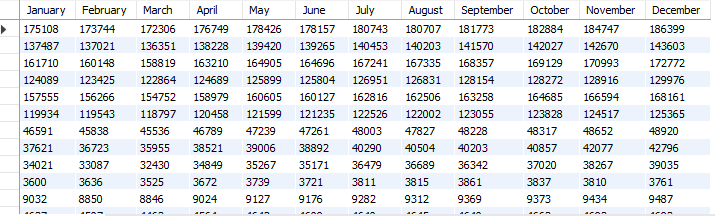


[Back to top](#Index)

## 3. Analysis and Visualization

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Before proceeding with the queries, I had to solve an issue I had. My tables only had Months as columns, without a column to related the months to some specific sale. Thus, a column with sales' descriptions had to be added. In the next line, you will see a python script doing just that.


In [198]:
import yaml
import mysql.connector
import matplotlib.pyplot as plt

db = yaml.safe_load(open('db.yaml'))

def Add_Kind_Of_Business_Column(year):
    config = {
    'user': db['user'],
    'password': db['pswd'],
    'host': db['host'],
    'database': db['db'],
    'auth_plugin': 'my_sqlnative_password'
    }

    cnx = mysql.connector.connect(**config)

    mycursor = cnx.cursor(buffered=True)  # Use buffered cursor

    mycursor.execute("""USE mrst_Entries;""")


    cnx.close()
    cnx = mysql.connector.connect(**config)
    mycursor = cnx.cursor()
    #         mycursor.execute("""USE mrst_Entries;""")
    mycursor.execute("""
        DROP TABLE IF EXISTS temp_tables_entries""")
    mycursor.execute(f"""
    CREATE TABLE temp_tables_entries AS SELECT * FROM """ + str(year)+ """_entries;

    ALTER TABLE temp_tables_entries
    ADD Kind_of_Business varchar(255);

    INSERT INTO temp_tables_entries (Kind_of_Business)
    VALUES 
    ('Retail_and_food_services_sales_total'),
    ('Retail_sales_and_food_services_excl_motor_vehicle_and_parts'),
    ('Retail_sales_and_food_services_excl_gasoline_stations'),
    ('Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations'),
    ('Retail_sales_total'),
    ('Retail_sales_total_excl_motor_vehicle_and_parts_dealers'),
    ('GAFO'),
    ('Motor_vehicle_and_parts_dealers'),
    ('Automobile_and_other_motor_vehicle_dealers'),
    ('Automotive_parts_acc_and_tire_stores'),
    ('Furniture_home_furn_electronics_and_appliance_stores'),
    ('Furniture_and_home_furnishings_stores'),
    ('Electronics_and_appliance_stores'),
    ('Building_mat_and_garden_equip_and_supplies_dealers'),
    ('Building_mat_and_supplies_dealers'),
    ('Food_and_beverage_stores'),
    ('Grocery_stores'),
    ('Beer_wine_and_liquor_stores'),
    ('Health_and_personal_care_stores'),
    ('Pharmacies_and_drug_stores'),
    ('Gasoline_stations'),
    ('Clothing_and_clothing_access_stores'),
    ('Clothing_stores'),
    ('Mens_clothing_stores'),
    ('Womens_clothing_stores'),
    ('Shoe_stores'),
    ('Jewelry_stores'),
    ('Sporting_goods_hobby_musical_instrument_and_book_stores'),
    ('General_merchandise_stores'),
    ('Department_stores'),
    ('Other_general_merchandise_stores'),
    ('Warehouse_clubs_and_superstores'),
    ('All_other_gen_merchandise_stores'),
    ('Miscellaneous_stores_retailers'),
    ('Nonstore_retailers'),
    ('Electronic_shopping_and_mail_order_houses'),
    ('Fuel_dealers'),
    ('Food_services_and_drinking_places');


    -- Step 1: Assign row numbers to non-null and null rows
    SET @row_num_non_null = 0;
    SET @row_num_null = 0;

    -- Create a temporary table for non-null businesses
    DROP TEMPORARY TABLE IF EXISTS NonNullBusiness;
    CREATE TEMPORARY TABLE NonNullBusiness AS 
    SELECT 
        (@row_num_non_null:=@row_num_non_null + 1) AS row_num, 
        Kind_Of_Business
    FROM temp_tables_entries
    WHERE Kind_Of_Business IS NOT NULL
    ORDER BY January, February, March, April, May, June, July, August, September, October, November, December;

    -- Create a temporary table for null businesses
    DROP TEMPORARY TABLE IF EXISTS NullBusiness;
    CREATE TEMPORARY TABLE NullBusiness AS 
    SELECT 
        (@row_num_null:=@row_num_null + 1) AS row_num, 
        January, 
        February, 
        March,
        April,
        May,
        June,
        July,
        August,
        September,
        October,
        November,
        December,
        Kind_Of_Business
    FROM temp_tables_entries
    WHERE Kind_Of_Business IS NULL
    ORDER BY January, February, March, April, May, June, July, August, September, October, November, December;

    -- Step 2: Update the null values
    UPDATE temp_tables_entries b
    JOIN NullBusiness nb ON b.January = nb.January AND b.February = nb.February -- ... repeat for all month columns
    LEFT JOIN NonNullBusiness nnb ON nb.row_num = nnb.row_num
    SET b.Kind_Of_Business = nnb.Kind_Of_Business
    WHERE b.Kind_Of_Business IS NULL;

    delete from temp_tables_entries
    where January is null;

    CREATE TABLE """ + str(year)+ """_entries_good AS SELECT * FROM temp_tables_entries;

    select * from """ + str(year)+ """_entries_good;

    DROP TABLE temp_tables_entries;

        """)

Add_Kind_Of_Business_Column(2020)

Iterations were not possible for the code above; it was giving me many problems where the previous iteration was not done before the next one started. I tried various methods, like fetchall(), commit(), close() in different spots inside the function, but non worked properly. Thus, I created the `Add_Kind_Of_Business_Column` function, and executed it for each year manually.

This is what the tables now look like:

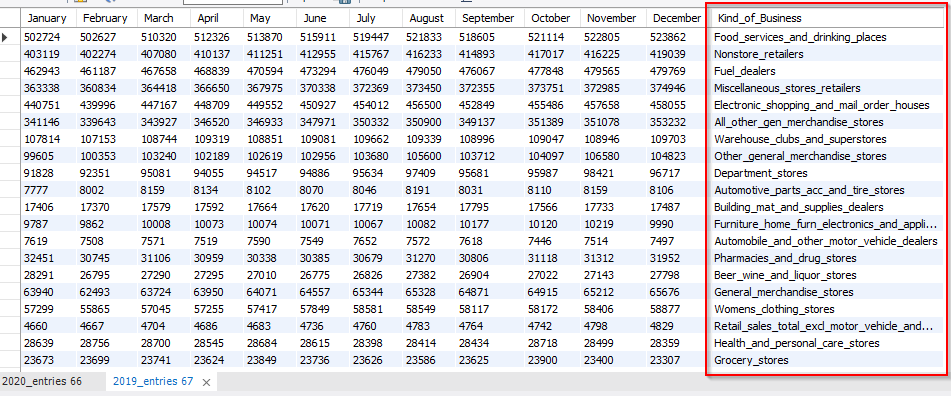

Moving on with analysis, I started by simply doing a select statement for the years shown:

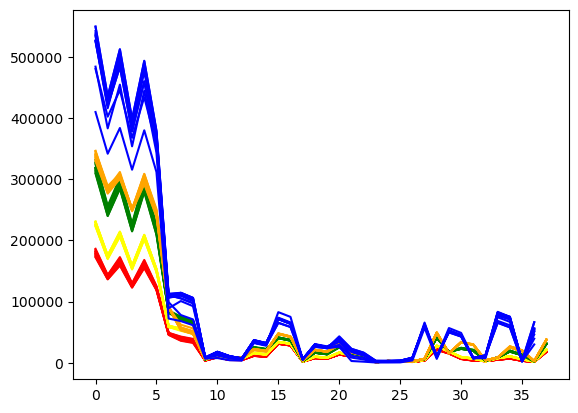

In [11]:
import yaml
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt

db = yaml.safe_load(open('db.yaml'))

entries_1992 = []
entries_1993 = []
entries_1994 = []
entries_1995 = []
entries_1996 = []
entries_1997 = []
entries_1998 = []
entries_1999 = []
entries_2000 = []
entries_2001 = []
entries_2002 = []
entries_2003 = []
entries_2004 = []
entries_2005 = []
entries_2006 = []
entries_2007 = []
entries_2008 = []
entries_2009 = []
entries_2010 = []
entries_2011 = []
entries_2012 = []
entries_2013 = []
entries_2014 = []
entries_2015 = []
entries_2016 = []
entries_2017 = []
entries_2018 = []
entries_2019 = []
entries_2020 = []



config = {
    'user': db['user'],
    'password': db['pswd'],
    'host': db['host'],
    'database': db['db'],
    'auth_plugin': 'my_sqlnative_password'
}

cnx = mysql.connector.connect(**config)

mycursor = cnx.cursor()


def selectAllFromYear(year, entries):
    loc_year = str(year)
    mycursor.execute("""
        SELECT * from """ + loc_year + """_Entries
    """)
    
    for i in mycursor.fetchall():
        # Keep only integer values from the tuple
        filtered_tuple = tuple(item for item in i if isinstance(item, int))
        entries.append(filtered_tuple)

    return entries

    

fetch1992 = selectAllFromYear(1992,entries_1992)
fetch1997 = selectAllFromYear(1997,entries_1997)
fetch2004 = selectAllFromYear(2004,entries_2004)
fetch2009 = selectAllFromYear(2009,entries_2009)
fetch2020 = selectAllFromYear(2020,entries_2020)
plt.plot(fetch1992, color='red')
plt.plot(fetch1997, color='yellow')
plt.plot(fetch2004, color='green')
plt.plot(fetch2009, color='orange')
plt.plot(fetch2020, color='blue')

[Back to top](#Index)

### 3.2 Running Queries From Python


Consider the following script; it is the first testing that I did to check my connection with the database.

![MySql_Connector](./Images/MySQL_PythonConnect.png)

And then, calling the script in the console gives the following:

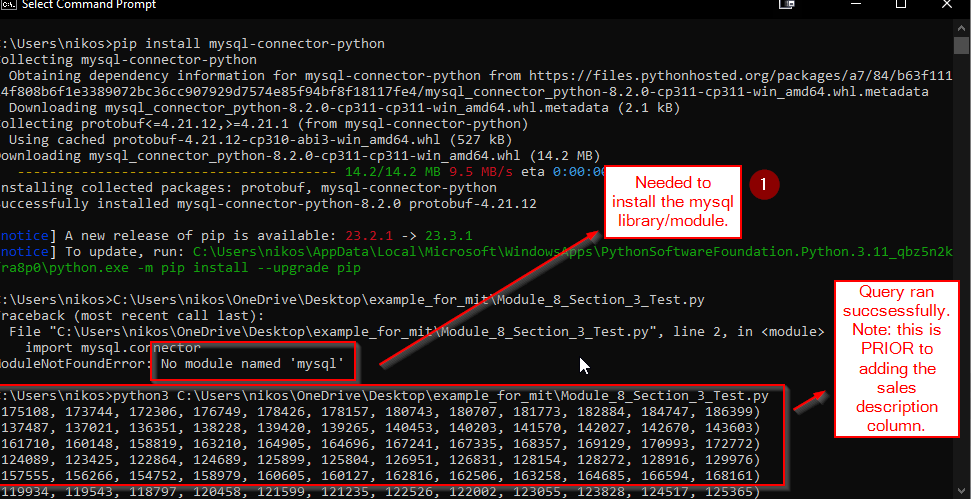

By executing the above script on the terminal, we verified that we have good connection with the database.

[Back to top](#Index)

### 3.3 Explore Trends

- **What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?**
An economic trend is a relation between an attribute (most often the price) of an asset, a service, or goods, for a given time period, with goal to make calculated predictions about that attribute. The data used is usually historical, and needs to be meaningful to the viewer of the trend.




Take a look at the following code. It generates a graph of January sales in the Jewelry sector. There is one line generated. The line represents the January sales values from 1992 through 2020. By looking at this trend, the viewer, possibly an economist, could come up with methods to take advantage of the Jewelry market. For example, the graph is clearly increasing in a linear manner, so the economist might make the following assumption:

- *Based on the graph from 1992 to 2020, it seems like the sales in Jewelry **y** are related to time **x** as **y = mx + b***. By finding ***m*** and ***b***, the economist could make good predictions on what the sales are going to be in the following years.

The graph, therefore, it can be considered an economic trend, since it could be used by an economist to make predictions. Here is the code to create it:

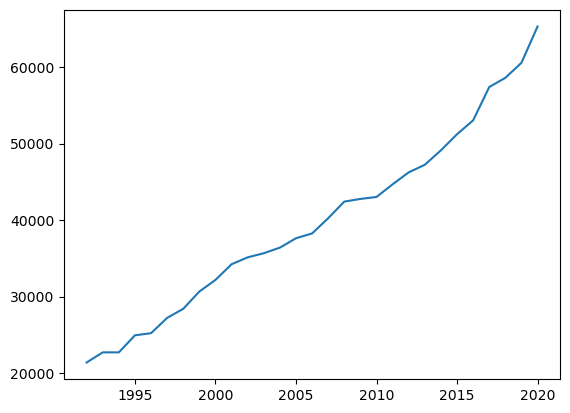

In [113]:
import yaml
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt

db = yaml.safe_load(open('db.yaml'))

config = {
    'user': db['user'],
    'password': db['pswd'],
    'host': db['host'],
    'database': db['db'],
    'auth_plugin': 'my_sqlnative_password'
}

cnx = mysql.connector.connect(**config)

mycursor = cnx.cursor()


def SelectMonthFromRange(month, Kind_Of_Business, startYear, endYear):
    entries = []  # This will hold all the entries from all years
    for i in range(startYear, endYear + 1):
        year = str(i)
        mycursor = cnx.cursor(buffered=True)
        # Construct the query string
        query = f"SELECT {month} from {year}_Entries where Kind_Of_Business = '{Kind_Of_Business}';"
        # Execute the query
        mycursor.execute(query)
        # Fetch the results from the cursor and extend the entries list
        entries.extend(mycursor.fetchall())
        # Close the cursor after its use
        mycursor.close()
    
    return entries

num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('January', 'Jewelry_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020


- **What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?**

Let's answer this question by examining the rows where `Kind_Of_Business = 'Retail_and_food_services_sales_total'`. We will pick `January` as the month columns, without loss of generality. The function `SelectMonthFromRange(month, Kind_Of_Business, startYear, endYear)` is still valid for this test:

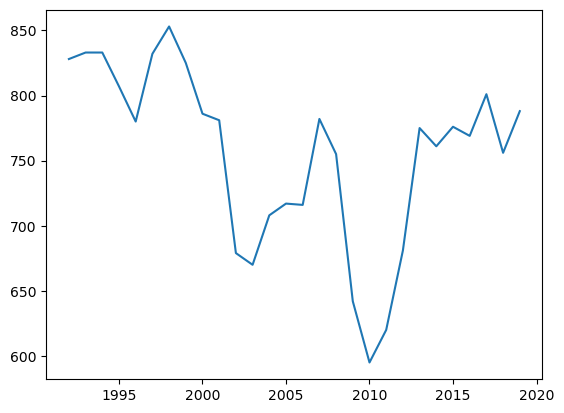

In [114]:
num_list = [i for i in range(1992,2020)]
entries = SelectMonthFromRange('January', 'Retail_and_food_services_sales_total', 1992, 2019)
plt.plot(num_list,entries) #from 1992 to 2019

The above graph shows values from 1992 through 2019. It was done like this because it is interesting to see what happened in 2020. Take a look at the graph of 1992 through 2020:

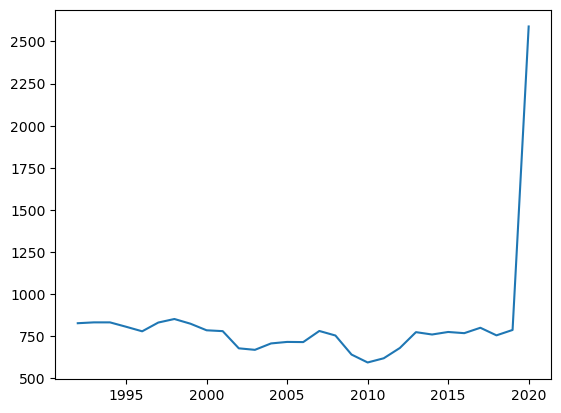

In [115]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('January', 'Retail_and_food_services_sales_total', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

As you see, it is a completely different graph! This means that January of 2020 had a major impact on the retail and food services sales.

- **When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly?**

Let's execute the `SelectMonthFromRange` function for each of those categories to see if we find any interesting patterns. This time, we are examining the row where `Kind_Of_Business = 'Sporting_goods_hobby_musical_instrument_and_book_stores'`, starting with January:

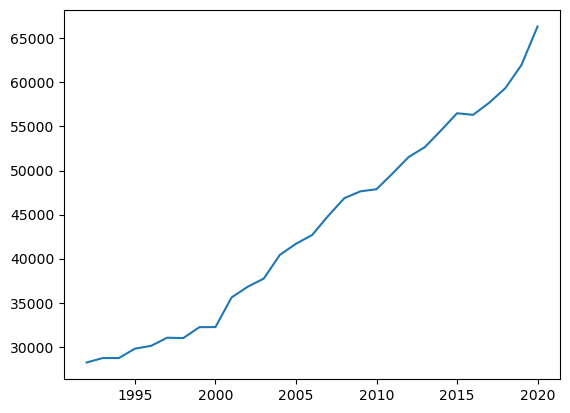

In [118]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('January', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2019

The above graph shows a linear relationship, as expected; up to January of 2020.

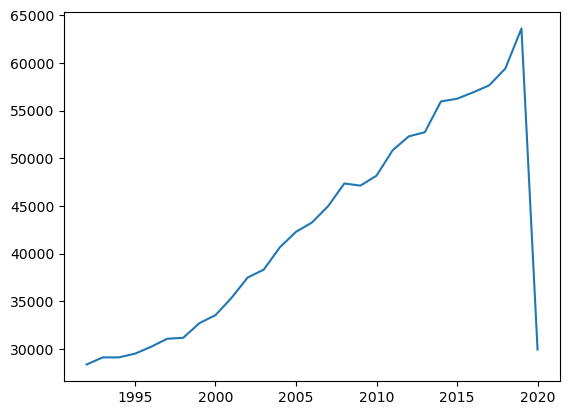

In [117]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('April', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

From the above graph, we notice that from January to April, something major occurred that completely changed the course of the sector. Of course, we recall the damages made to the general economy from Covid-19 starting in end of March-beginning of April 2020, which explains the steep decline of the graph.

Going back to the question: **'...what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly?'** Unfortunately, given that we have selected the ***Adjusted*** dataset for this project, we do not have the values asked here. We can however examine the relationship but among other assets in the ***Adjusted*** dataset.

Consider the rows where January is in:
- Furniture_home_furn_electronics_and_appliance_stores
- Clothing_and_clothing_access_stores
- Sporting_goods_hobby_musical_instrument_and_book_stores
- Grocery_Stores

Let's examine their relationships (Checking `April`, as we expect to see interesting data starting here, based on the results we just found). First, each graph by itself, and then all together:

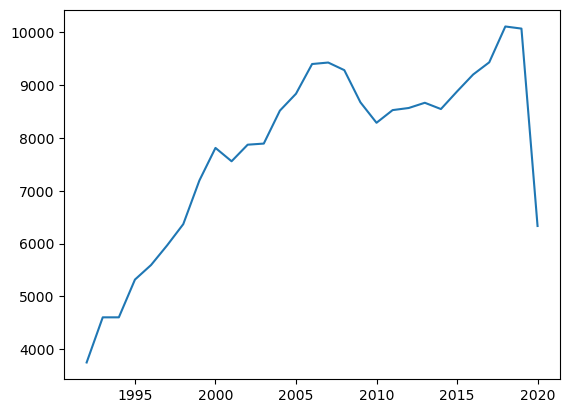

In [120]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('April', 'Furniture_home_furn_electronics_and_appliance_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

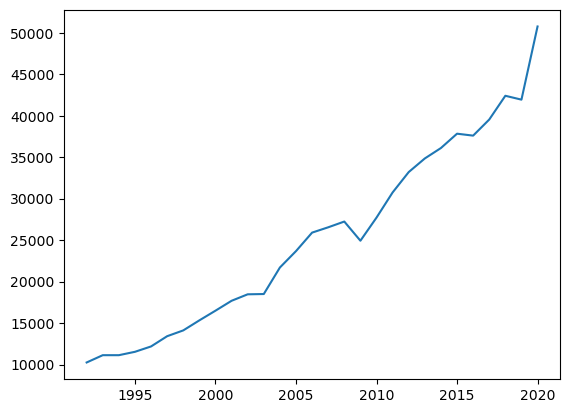

In [125]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('April', 'Clothing_and_clothing_access_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

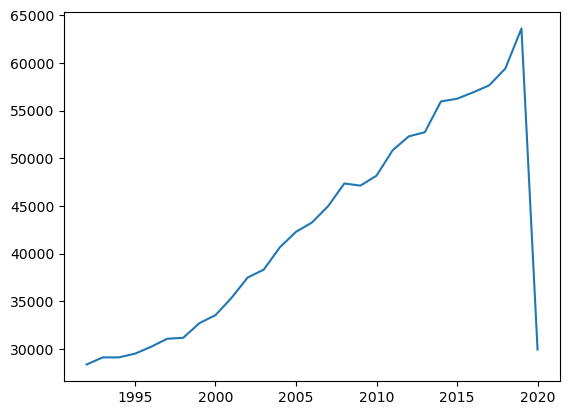

In [127]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('April', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

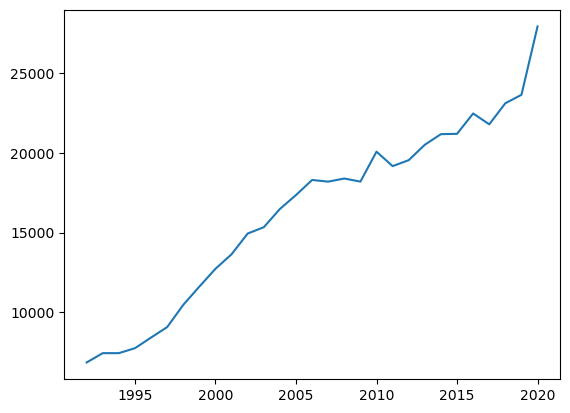

In [130]:
num_list = [i for i in range(1992,2021)]
entries = SelectMonthFromRange('April', 'Grocery_Stores', 1992, 2020)
plt.plot(num_list,entries) #from 1992 to 2020

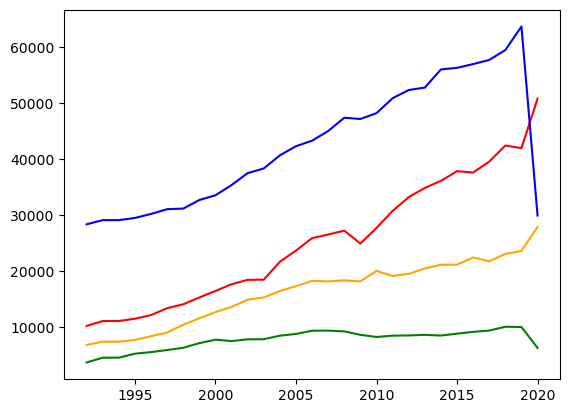

In [137]:
entries1 = SelectMonthFromRange('April', 'Furniture_home_furn_electronics_and_appliance_stores', 1992, 2020)
entries2 = SelectMonthFromRange('April', 'Clothing_and_clothing_access_stores', 1992, 2020)
entries3 = SelectMonthFromRange('April', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
entries4 = SelectMonthFromRange('April', 'Grocery_Stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.plot(num_list,entries1, color = 'green')
plt.plot(num_list,entries2, color = 'red')
plt.plot(num_list,entries3, color = 'blue')
plt.plot(num_list,entries4, color = 'orange')

Now we can answer the questions:

**What is the highest trend of all of these options?**
- Up to 2020, it was Furniture_home_furn_electronics_and_appliance_stores. From 2020 onwards, it seems like Clothing_and_clothing_access_stores to be the highest trend.

**Which one grew faster?**
- Even though Furniture_home_furn_electronics_and_appliance_stores seemed to be the highest for almost all of the years, Clothing_and_clothing_access_stores has the steepest slope, meaning that it has the highest growth.

**Which one is higher?**
- Clothing_and_clothing_access_stores is currently the highest.

**Is there a seasonal pattern?**
- Yes, there is. We can examine some other months other than april, and find that the graphs will be different. Take a look at the same data but for January, July, and December:

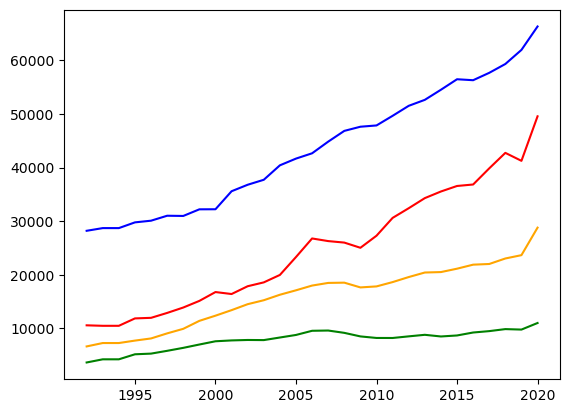

In [138]:
entries1 = SelectMonthFromRange('January', 'Furniture_home_furn_electronics_and_appliance_stores', 1992, 2020)
entries2 = SelectMonthFromRange('January', 'Clothing_and_clothing_access_stores', 1992, 2020)
entries3 = SelectMonthFromRange('January', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
entries4 = SelectMonthFromRange('January', 'Grocery_Stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.plot(num_list,entries1, color = 'green')
plt.plot(num_list,entries2, color = 'red')
plt.plot(num_list,entries3, color = 'blue')
plt.plot(num_list,entries4, color = 'orange')

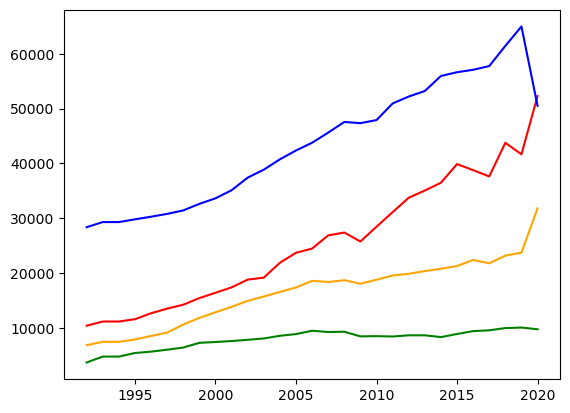

In [139]:
entries1 = SelectMonthFromRange('June', 'Furniture_home_furn_electronics_and_appliance_stores', 1992, 2020)
entries2 = SelectMonthFromRange('June', 'Clothing_and_clothing_access_stores', 1992, 2020)
entries3 = SelectMonthFromRange('June', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
entries4 = SelectMonthFromRange('June', 'Grocery_Stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.plot(num_list,entries1, color = 'green')
plt.plot(num_list,entries2, color = 'red')
plt.plot(num_list,entries3, color = 'blue')
plt.plot(num_list,entries4, color = 'orange')

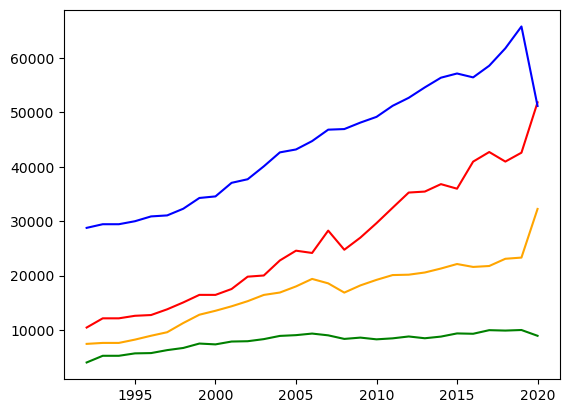

In [140]:
entries1 = SelectMonthFromRange('December', 'Furniture_home_furn_electronics_and_appliance_stores', 1992, 2020)
entries2 = SelectMonthFromRange('December', 'Clothing_and_clothing_access_stores', 1992, 2020)
entries3 = SelectMonthFromRange('December', 'Sporting_goods_hobby_musical_instrument_and_book_stores', 1992, 2020)
entries4 = SelectMonthFromRange('December', 'Grocery_Stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.plot(num_list,entries1, color = 'green')
plt.plot(num_list,entries2, color = 'red')
plt.plot(num_list,entries3, color = 'blue')
plt.plot(num_list,entries4, color = 'orange')

**Were there any changes in 2020?**
- Yes, the trends changed, especially the one for Furniture_home_furn_electronics_and_appliance_stores, as described above.

**Which is better, monthly or yearly?**
- In our analysis, we execute the graphs on a yearly basis. However, we also examine the graphs for different months but for the same timeframe, which in turn means that we are doing some analysis on a monthly basis. As far as which is better, it depends on the experiment. In our case, we have data across 28 years, thus it makes sense to make the analysis across multiple years, like we have done in this analysis.

[Back to top](#Index)

### 3.4 Explore Percentage Change

- **In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?**
In economics, *percentage change* is a way to describe the degree of change over time in a particular variable. It is calculated as the difference between the new value and the original value, divided by the absolute value of the original value, and then multiplied by 100 to get a percentage. Here is the formula:

$Percentage Change = ( (New Value - Original Value) / |Original Value| ) * 100$

- **Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?**

Let's explore the women's and men's clothing businesses. We begin by graphing them:

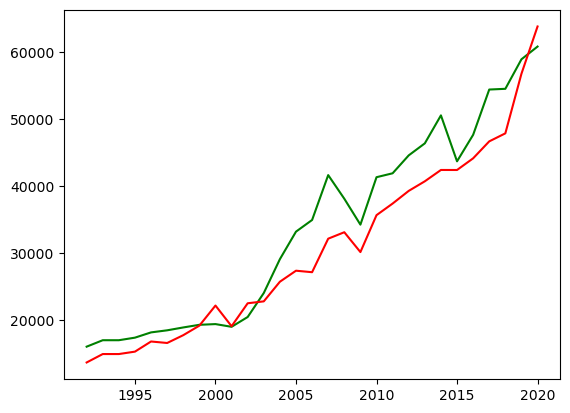

In [155]:
entries1 = SelectMonthFromRange('December', 'Womens_clothing_stores', 1992, 2020)
entries2 = SelectMonthFromRange('December', 'Mens_clothing_stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.plot(num_list,entries1, color = 'green')
plt.plot(num_list,entries2, color = 'red')

The two businesses are closely related, based on their graphs. Let's take a look at a scatter plot as well:

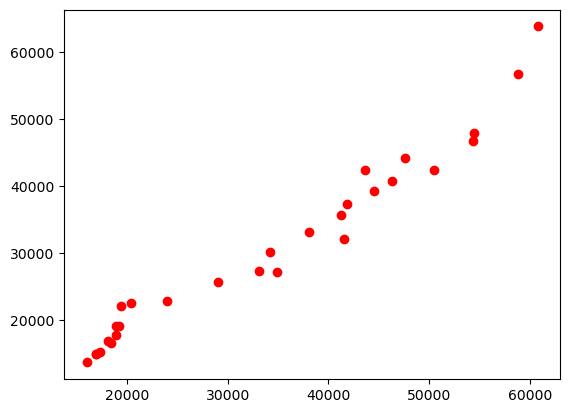

In [149]:
entries1 = SelectMonthFromRange('December', 'Womens_clothing_stores', 1992, 2020)
entries2 = SelectMonthFromRange('December', 'Mens_clothing_stores', 1992, 2020)

num_list = [i for i in range(1992,2021)]
plt.scatter(entries1,entries2, color = 'red')

Now let's explor their percentage change. There is some manipulation that needs to be done to our datasets in order to make them pandas dataframes. We need to do this, in order to use the `pct_change()` function from pandas. We do the following:

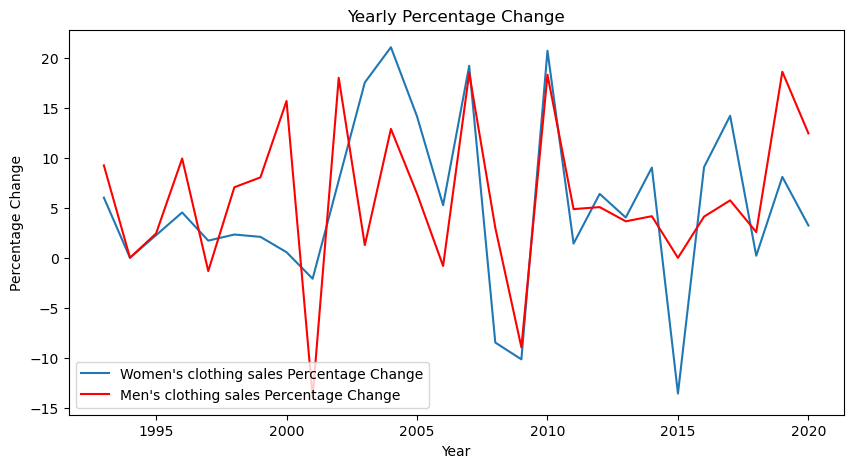

In [184]:
# # Convert lists of tuples into pandas Series and flatten the tuples
series1 = pd.Series([x[0] for x in entries1])
series2 = pd.Series([x[0] for x in entries2])

# Calculate the percentage change
pct_change1 = series1.pct_change() * 100
pct_change2 = series2.pct_change() * 100

# Convert the years list into a pandas Series to use as an index
years = pd.Series([i for i in range(1992, 2021)])

# Assign the years as the index for the percentage change Series
pct_change1.index = years
pct_change2.index = years

# Let's improve our plot to see some more details:

plt.figure(figsize=(10, 5))
plt.plot(years, pct_change1, label='Women\'s clothing sales Percentage Change')
plt.plot(years, pct_change2, label='Men\'s clothing sales Percentage Change', color='red')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Yearly Percentage Change')
plt.legend()
plt.show()

Now let's focus on answering the questions:

**How are these two businesses related?**
- The two businesses are closely correlated, as it is evident from scatter and plot graphs; they are directly proportional.

**For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?**

- For this, we will consider the first and last points of each of the two graphs, that is, the value of each dataset at 1993 (because 1992 is actually NaN) and 2020. The percentage for each has changed over time as follows:

In [188]:
difference_women = pct_change1.iloc[1] - pct_change1.iloc[-2]
difference_men = pct_change2.iloc[1] - pct_change1.iloc[-2]
print(f'Percentage difference for women from 1993 (because 1992 is NaN) to 2020 is {difference_women}.')
print(f'Percentage difference for men from 1993 (because 1992 is NaN) to 2020 is {difference_men}.')

Percentage difference for women from 1993 (because 1992 is NaN) to 2020 is -2.075965385700319.
Percentage difference for men from 1993 (because 1992 is NaN) to 2020 is 1.1449489608066123.


[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?

**In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?**
- The rolloing time window refers to a method of data analysis that involves continuously recalculating a statistic over a fixed-size time period as new data becomes available. This technique is used to analyze time series data by creating a series of averages of different subsets of the full data set.

**Consider at least two businesses of your own from the MRTS data. Which queries did you write to analyze and produce graphs of rolling time windows for the chosen categories?**

- Consider the `Motor_vehicle_and_parts_dealers` and `Electronics_and_appliance_stores`. We can find their rolling time windows for the year, using monthly data. We will perform the following:
    1. 



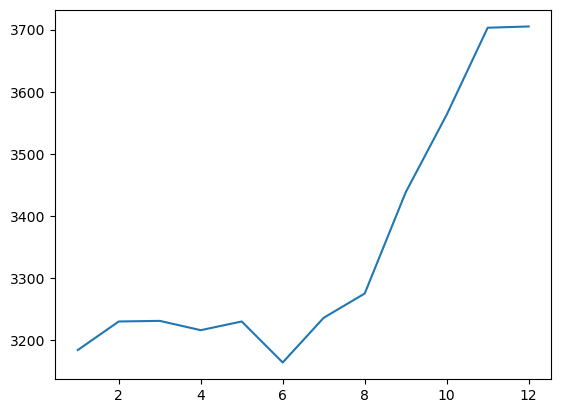

In [234]:
# The entires is a list with data from each month of 1992. It is not yet in the format we need
entries = list(range(12))
entries[0] = SelectMonthFromRange('January', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[1] = SelectMonthFromRange('February', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[2] = SelectMonthFromRange('March', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[3] = SelectMonthFromRange('April', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[4] = SelectMonthFromRange('May', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[5] = SelectMonthFromRange('June', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[6] = SelectMonthFromRange('July', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[7] = SelectMonthFromRange('August', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[8] = SelectMonthFromRange('September', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[9] = SelectMonthFromRange('October', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[10] = SelectMonthFromRange('November', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[11] = SelectMonthFromRange('December', 'Motor_vehicle_and_parts_dealers', 1992, 1992)

# Convert the "entries" list to one more to be able to be manipulated easier
entries_list = []
for i in range(0,12):
    entry = entries[i][0][0]
    entries_list.append(entry)

# Create months (1 through 12). Those will be plotted along with our data from the "entries list"
months = [i for i in range(1,13)]

plt.plot(months,entries_list, label='Motor_vehicle_and_parts_dealers general graph')

Now, let's do the same for `Electronics_and_appliance_stores`:

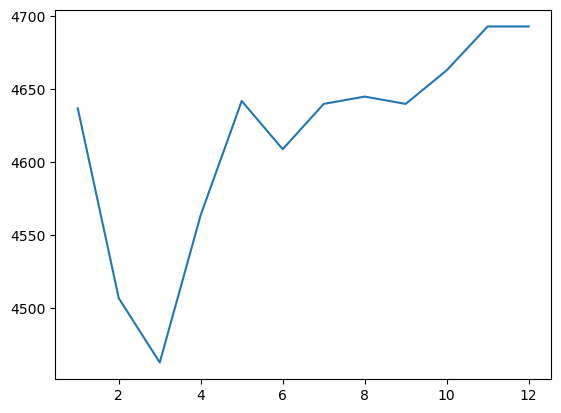

In [235]:
# The entires is a list with data from each month of 1992. It is not yet in the format we need
entries = list(range(12))
entries[0] = SelectMonthFromRange('January', 'Electronics_and_appliance_stores', 1992, 1992)
entries[1] = SelectMonthFromRange('February', 'Electronics_and_appliance_stores', 1992, 1992)
entries[2] = SelectMonthFromRange('March', 'Electronics_and_appliance_stores', 1992, 1992)
entries[3] = SelectMonthFromRange('April', 'Electronics_and_appliance_stores', 1992, 1992)
entries[4] = SelectMonthFromRange('May', 'Electronics_and_appliance_stores', 1992, 1992)
entries[5] = SelectMonthFromRange('June', 'Electronics_and_appliance_stores', 1992, 1992)
entries[6] = SelectMonthFromRange('July', 'Electronics_and_appliance_stores', 1992, 1992)
entries[7] = SelectMonthFromRange('August', 'Electronics_and_appliance_stores', 1992, 1992)
entries[8] = SelectMonthFromRange('September', 'Electronics_and_appliance_stores', 1992, 1992)
entries[9] = SelectMonthFromRange('October', 'Electronics_and_appliance_stores', 1992, 1992)
entries[10] = SelectMonthFromRange('November', 'Electronics_and_appliance_stores', 1992, 1992)
entries[11] = SelectMonthFromRange('December', 'Electronics_and_appliance_stores', 1992, 1992)

# Convert the "entries" list to one more to be able to be manipulated easier
entries_list = []
for i in range(0,12):
    entry = entries[i][0][0]
    entries_list.append(entry)

# Create months (1 through 12). Those will be plotted along with our data from the "entries list"
months = [i for i in range(1,13)]

plt.plot(months,entries_list, label='Electronics_and_appliance_stores general graph')

Next, we need to do some data conversions, in order to use `pandas.DataFrame.rolling`.

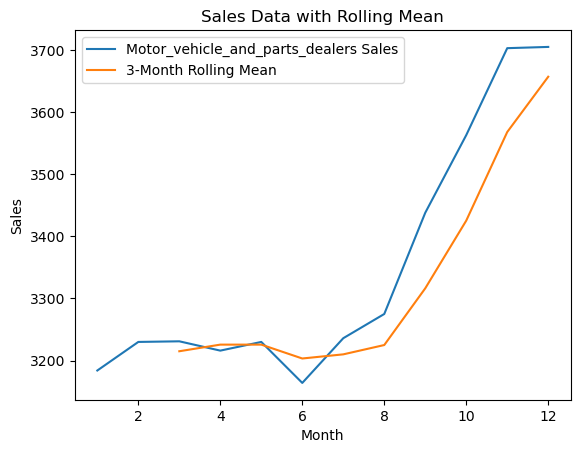

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# The entires is a list with data from each month of 1992. It is not yet in the format we need
entries = list(range(12))
entries[0] = SelectMonthFromRange('January', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[1] = SelectMonthFromRange('February', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[2] = SelectMonthFromRange('March', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[3] = SelectMonthFromRange('April', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[4] = SelectMonthFromRange('May', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[5] = SelectMonthFromRange('June', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[6] = SelectMonthFromRange('July', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[7] = SelectMonthFromRange('August', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[8] = SelectMonthFromRange('September', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[9] = SelectMonthFromRange('October', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[10] = SelectMonthFromRange('November', 'Motor_vehicle_and_parts_dealers', 1992, 1992)
entries[11] = SelectMonthFromRange('December', 'Motor_vehicle_and_parts_dealers', 1992, 1992)

# Convert the "entries" list to one more to be able to be manipulated easier
entries_list = []
for i in range(0,12):
    entry = entries[i][0][0]
    entries_list.append(entry)

# Create months (1 through 12)
months = [i for i in range(1, 13)]

# Create a DataFrame from the entries_list with months as the index
df = pd.DataFrame({
    'Sales': entries_list
}, index=months)

# Using a rolling mean with a window of 3 months
rolling_window = 3
df['RollingMean'] = df['Sales'].rolling(window=rolling_window).mean()

# Plotting the original data
plt.plot(df.index, df['Sales'], label='Motor_vehicle_and_parts_dealers Sales')

# Plotting the rolling mean
plt.plot(df.index, df['RollingMean'], label='3-Month Rolling Mean')

# Adding legend, labels and title
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Data with Rolling Mean')
plt.show()


Finally, for `Electronics_and_appliance_stores`:

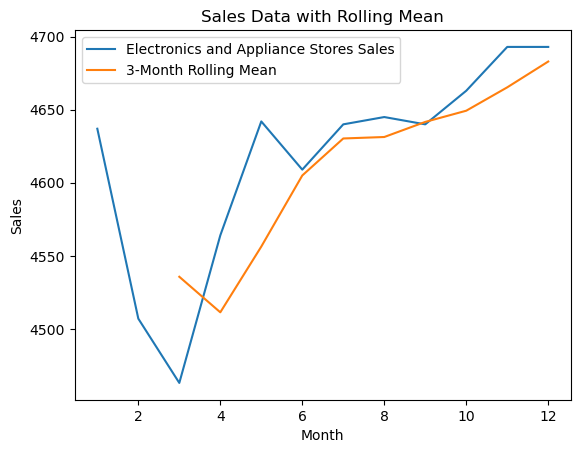

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

# The entires is a list with data from each month of 1992. It is not yet in the format we need
entries = list(range(12))
entries[0] = SelectMonthFromRange('January', 'Electronics_and_appliance_stores', 1992, 1992)
entries[1] = SelectMonthFromRange('February', 'Electronics_and_appliance_stores', 1992, 1992)
entries[2] = SelectMonthFromRange('March', 'Electronics_and_appliance_stores', 1992, 1992)
entries[3] = SelectMonthFromRange('April', 'Electronics_and_appliance_stores', 1992, 1992)
entries[4] = SelectMonthFromRange('May', 'Electronics_and_appliance_stores', 1992, 1992)
entries[5] = SelectMonthFromRange('June', 'Electronics_and_appliance_stores', 1992, 1992)
entries[6] = SelectMonthFromRange('July', 'Electronics_and_appliance_stores', 1992, 1992)
entries[7] = SelectMonthFromRange('August', 'Electronics_and_appliance_stores', 1992, 1992)
entries[8] = SelectMonthFromRange('September', 'Electronics_and_appliance_stores', 1992, 1992)
entries[9] = SelectMonthFromRange('October', 'Electronics_and_appliance_stores', 1992, 1992)
entries[10] = SelectMonthFromRange('November', 'Electronics_and_appliance_stores', 1992, 1992)
entries[11] = SelectMonthFromRange('December', 'Electronics_and_appliance_stores', 1992, 1992)

# Convert the "entries" list to one more to be able to be manipulated easier
entries_list = []
for i in range(0,12):
    entry = entries[i][0][0]
    entries_list.append(entry)

# Create months (1 through 12)
months = [i for i in range(1, 13)]

# Create a DataFrame from the entries_list with months as the index
df = pd.DataFrame({
    'Sales': entries_list
}, index=months)

# Using a rolling mean with a window of 3 months
rolling_window = 3
df['RollingMean'] = df['Sales'].rolling(window=rolling_window).mean()

# Plotting the original data
plt.plot(df.index, df['Sales'], label='Electronics and Appliance Stores Sales')

# Plotting the rolling mean
plt.plot(df.index, df['RollingMean'], label='3-Month Rolling Mean')

# Adding legend, labels and title
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Data with Rolling Mean')
plt.show()


We have now completed all analysis for the Rolling Mean.

[Back to top](#Index)

## Conclusion

Let's consider the last two categories that we compared, using rolling windows.

**Motor_vehicle_and_parts_dealers**:
The rolling average data for this category starts at 3184 and shows a generally increasing trend over the period, ending at 3705. There's a noticeable uptick towards the end, suggesting a strong end-of-period performance. This upward trend could indicate growing consumer interest or increased spending in this sector.

**Electronics_and_appliance_stores**:
The figures for this category start higher than the `Motor_vehicle_and_parts_dealers` at 4637 but show a less dynamic range, hovering around the mid-4600s throughout and ending at 4693. The trend here is relatively stable with a slight upward movement, suggesting consistent spending with a potential for moderate growth.

**Conclusion**:
Given the upward trend, `Motor_vehicle_and_parts_dealers` seems to have a strong growth trajectory, potentially attracting more spending towards the end of the period. This could be indicative of a robust market demand or successful industry developments stimulating consumer spending.

In contrast, `Electronics_and_appliance_stores`, despite starting at a higher point and maintaining stability, shows less growth over the same period. The stability is a positive sign, indicating that spending is consistent, but the lesser growth rate compared to `Motor_vehicle_and_parts_dealers` might suggest that it could attract relatively less incremental spending in the future if current trends hold.

Therefore, based on this specific rolling average data, `Motor_vehicle_and_parts_dealers` seems likely to attract more incremental spending than `Electronics_and_appliance_stores`, which may see steady but less dynamic spending patterns. However, the actual spending attraction can be influenced by many factors, including economic conditions, consumer preferences, technological advancements, and competitive actions in the marketplace.



[Back to top](#Index
)
## References

- GeeksForGeeks. “Python” GeeksForGeeks. Pandas, 2023. https://www.geeksforgeeks.org/python-pandas-dataframe-pct_change/ .
- Pydata. “Pandas” Pandas, 2023. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html .
- w3Schools. “Python” w3schools, 2023. https://www.w3schools.com/python .